# DataCamp Certification Case Study

### Project Brief

You have been hired by Inn the Neighborhood, an online platform that allows people to rent out their properties for short stays. Currently, the webpage for renters has a conversion rate of 2%. This means that most people leave the platform without signing up. 

The product manager would like to increase this conversion rate. They are interested in developing an application to help people estimate the money they could earn renting out their living space. They hope that this would make people more likely to sign up.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the product manager in a 10 minute presentation. The product manager has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

# Motivation

As an online marketplace for rental the pipeline of clients offering space is as important as clients looking for rentals.
The value proposition of the online platform is to connect the demand to suppliers of rooms. So, empty shelves in online stores area a big problem.
The advertising need in this kind of business has two targets, the supplier (the renter) and the final client (the tenant).
This work is a task of a bigger concern on focusing in supplier costumer experience improving the services offered by the site.
The main operation issue today is that only **2%** of the webpage for renters go to the end of the due process to offer his property, a small conversion rate.
To catch up interest and offer more value to renters the site owners believe an app estimating the future revenue of the new renters could stimulate them to finish the property application.
A limitation of error of **25 dollars** was warned by the owners and must be considerate when evaluation the results.
The rentals price with information about **id, latitude, longitude, property type, room type, bathrooms, bedrooms and minimum nights** are presented as a csv file.
So this work aim is to predict price and has three clients’ targets:
- the site owner
- the renter
- the tenant

The market and society will receive the benefit of the help for the owner to public offer an Artificial Intelligence app to estimate rental prices, and then the renter will know how much ask for the rental increasing the offer of spaces, leaving the tenants with more options to stay at city.



### Analysis notes
=> Analysis Planning

Besides the usual metrics if error for evaluation, the site owner asked a threshold of 25 dollars.
So, the % total of real prices que surpass 25 dollars of the predicted price will be the main indicator of model quality.



In [1]:
# Importing modules, many are used several time like seaborn and pyplot. To keep a clean code all importing was made at the beggining
import pandas as pd
from decimal import Decimal
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import xgboost as xgb


2022-06-21 04:48:47.367737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 04:48:47.367766: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# reading dataset
df = pd.read_csv("data/rentals.csv")

#print to avaliate the rows and colluns
print(df.head(n=10))

      id  latitude  longitude property_type        room_type  bathrooms  \
0    958  37.76931 -122.43386     Apartment  Entire home/apt        1.0   
1   3850  37.75402 -122.45805         House     Private room        1.0   
2   5858  37.74511 -122.42102     Apartment  Entire home/apt        1.0   
3   7918  37.76669 -122.45250     Apartment     Private room        4.0   
4   8142  37.76487 -122.45183     Apartment     Private room        4.0   
5   8339  37.77525 -122.43637         House  Entire home/apt        1.5   
6   8739  37.75919 -122.42237   Condominium     Private room        1.0   
7   9225  37.76259 -122.40543         House     Private room        1.0   
8  10251  37.75874 -122.41327         House  Entire home/apt        1.0   
9  10578  37.79143 -122.41544     Apartment  Entire home/apt        1.0   

   bedrooms  minimum_nights     price  
0       1.0               1  $170.00   
1       1.0               1   $99.00   
2       2.0              30  $235.00   
3       1.0   

### Analysis notes
=>Collect Data

Data seems unstructured, probably registered by id sequentially.
Tasks to clean data:

- Check possibility of Data duplicated
- Check Property and Room type typo/misspelling
- Price with $ must be transformed in float
- Check for missing data
- Deal with price equal zero
- Some independent variables should receive treatment



In [3]:
#cheking for duplicates
df.loc[:,df.columns != 'id'].duplicated().sum()
print("There are {} duplicate values.".format(df.loc[:,df.columns != 'id'].duplicated().sum()))
bool_series = df.loc[:,df.columns != 'id'].duplicated()
print(df[bool_series])

There are 1 duplicate values.
            id  latitude  longitude   property_type     room_type  bathrooms  \
7048  34931105  37.78941  -122.4066  Boutique hotel  Private room        1.0   

      bedrooms  minimum_nights     price  
7048       1.0               5  $199.00   


### Analysis notes
=> Clean Data

One case found, but it is a hotel so the same data is expected (same description, same price but different room number and owner), no need for further action.

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling
- Price with $ must be transformed in float
- Check for missing data
- Deal with price equal zero
- Some independent variables should receive treatment

In [4]:
# check for typo or wrong spelling for Property type column
df["property_type"].value_counts()

Apartment             3243
House                 2314
Condominium            892
Guest suite            577
Boutique hotel         267
Hotel                  157
Townhouse              142
Serviced apartment     121
Hostel                  92
Loft                    88
Bed and breakfast       43
Aparthotel              41
Guesthouse              41
Other                   24
Bungalow                17
Resort                  14
Cottage                 12
Villa                   10
Castle                   4
Cabin                    3
Tiny house               3
Earth house              2
Dome house               1
In-law                   1
Hut                      1
Camper/RV                1
Name: property_type, dtype: int64

In [5]:
# check for typo or wrong spelling for Room type column
df["room_type"].value_counts()

Entire home/apt    4772
Private room       2891
Shared room         241
Hotel room          207
Name: room_type, dtype: int64

### Analysis notes
=> Clean Data

Both cases the count list do not show any abnormality, probably the registration form has limited options or a validation embedded.

The property type *Other* case should be discussed with the owner, some small classifications are presented with few entries, but it seems has a large range from caste to tiny house. It is important to evaluate to add smaller cases on other classification or create new classification branching for *Other*.

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float
- Check for missing data
- Deal with price equal zero
- Some independent variables should receive treatment

In [6]:
#transform the last collum in a float number
df['price'] = df['price'].apply(lambda p: p.strip('$').replace(",",""))
df2 = df.astype({'price': float})
df2.head(n=10)


id  latitude  longitude property_type        room_type  bathrooms  \
0    958  37.76931 -122.43386     Apartment  Entire home/apt        1.0   
1   3850  37.75402 -122.45805         House     Private room        1.0   
2   5858  37.74511 -122.42102     Apartment  Entire home/apt        1.0   
3   7918  37.76669 -122.45250     Apartment     Private room        4.0   
4   8142  37.76487 -122.45183     Apartment     Private room        4.0   
5   8339  37.77525 -122.43637         House  Entire home/apt        1.5   
6   8739  37.75919 -122.42237   Condominium     Private room        1.0   
7   9225  37.76259 -122.40543         House     Private room        1.0   
8  10251  37.75874 -122.41327         House  Entire home/apt        1.0   
9  10578  37.79143 -122.41544     Apartment  Entire home/apt        1.0   

   bedrooms  minimum_nights  price  
0       1.0               1  170.0  
1       1.0               1   99.0  
2       2.0              30  235.0  
3       1.0              32   65.0  
4       1.0              32   65.0  
5       2.0               6  875.0  
6       1.0               1  139.0  
7       1.0               1  135.0  
8       2.0              30  225.0  
9       0.0              30  120.0

### Analysis notes
=> Clean Data and Exploratory Analysis

Last column transformed in a float number to allow math processing for prediction. This is not a classification problem, but a value prediction.

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data
- Deal with price equal zero
- Some independent variables should receive treatment

In [7]:
#analyzing the data
df2.describe()

id     latitude    longitude    bathrooms     bedrooms  \
count  8.111000e+03  8111.000000  8111.000000  8099.000000  8107.000000   
mean   2.024561e+07    37.766054  -122.430107     1.395975     1.345874   
std    1.228565e+07     0.022937     0.026967     0.923213     0.925298   
min    9.580000e+02    37.704630  -122.513060     0.000000     0.000000   
25%    8.905668e+06    37.751450  -122.442830     1.000000     1.000000   
50%    2.161057e+07    37.769150  -122.424650     1.000000     1.000000   
75%    3.120025e+07    37.785670  -122.410615     1.500000     2.000000   
max    3.935418e+07    37.828790  -122.368570    14.000000    14.000000   

       minimum_nights         price  
count    8.111000e+03   8111.000000  
mean     1.234526e+04    225.407101  
std      1.110357e+06    412.253039  
min      1.000000e+00      0.000000  
25%      2.000000e+00    100.000000  
50%      4.000000e+00    150.000000  
75%      3.000000e+01    240.000000  
max      1.000000e+08  10000.000000

In [8]:
#close attention to the missing data
df2[df2.isna().any(axis=1)]

id  latitude  longitude property_type        room_type  bathrooms  \
139     144978  37.79336 -122.42506     Apartment     Private room        NaN   
181     229240  37.79341 -122.40340        Hostel      Shared room        NaN   
196     259621  37.79470 -122.40374        Hostel      Shared room        NaN   
197     259622  37.79441 -122.40473        Hostel      Shared room        NaN   
267     430692  37.75906 -122.40761     Apartment     Private room        NaN   
269     431862  37.78321 -122.41969     Apartment  Entire home/apt        1.0   
352     596042  37.79384 -122.42436     Apartment     Private room        NaN   
434     785901  37.79313 -122.40443        Hostel      Shared room        NaN   
435     786492  37.79421 -122.40310        Hostel      Shared room        NaN   
436     786506  37.79260 -122.40339        Hostel      Shared room        NaN   
539    1031899  37.74833 -122.42621     Apartment  Entire home/apt        NaN   
606    1206233  37.77028 -122.44757     Apartment     Private room        NaN   
6301  32183178  37.78883 -122.48640         House  Entire home/apt        3.5   
7036  34902361  37.77790 -122.43688     Apartment     Private room        NaN   
7786  38329898  37.78347 -122.41669     Apartment  Entire home/apt        1.0   
7840  38550933  37.78979 -122.41994     Apartment  Entire home/apt        1.0   

      bedrooms  minimum_nights  price  
139        1.0              30   56.0  
181        1.0               1   45.0  
196        1.0               1   45.0  
197        1.0               1   45.0  
267        1.0              31   68.0  
269        NaN              30  124.0  
352        1.0              30   63.0  
434        1.0               1   45.0  
435        1.0               1   45.0  
436        1.0               1   45.0  
539        1.0              30  127.0  
606        1.0               1   79.0  
6301       NaN              30  650.0  
7036       1.0              30   50.0  
7786       NaN              30   75.0  
7840       NaN              30  108.0

### Analysis notes
=> Clean Data

Only bathrooms and bedrooms have missing data

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data
- Deal with price equal zero
- Some independent variables should receive treatment

In [9]:
# analysing bathrooms
print(df2[df2['bathrooms'].isna()])

df2['bathrooms'] = df2['bathrooms'].fillna(0)

            id  latitude  longitude property_type        room_type  bathrooms  \
139     144978  37.79336 -122.42506     Apartment     Private room        NaN   
181     229240  37.79341 -122.40340        Hostel      Shared room        NaN   
196     259621  37.79470 -122.40374        Hostel      Shared room        NaN   
197     259622  37.79441 -122.40473        Hostel      Shared room        NaN   
267     430692  37.75906 -122.40761     Apartment     Private room        NaN   
352     596042  37.79384 -122.42436     Apartment     Private room        NaN   
434     785901  37.79313 -122.40443        Hostel      Shared room        NaN   
435     786492  37.79421 -122.40310        Hostel      Shared room        NaN   
436     786506  37.79260 -122.40339        Hostel      Shared room        NaN   
539    1031899  37.74833 -122.42621     Apartment  Entire home/apt        NaN   
606    1206233  37.77028 -122.44757     Apartment     Private room        NaN   
7036  34902361  37.77790 -12

### Analysis notes
=> Clean Data

Bathrooms most of NaN cases are hostels, the other cases are private Room. 
0 Bathrooms (shared bathrooms) are expected at hostels
To consistency the NaN will be replaced with 0, keeping the entry in our data

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/mispelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data
- Deal with price equal zero
- Some independent variables should receive treatment

In [10]:
# analysing bedrooms
df_zero_bed = df2[((df2['bedrooms'] == 0) & (df2['room_type'] == 'Entire home/apt'))]
print(df_zero_bed.shape)

df_one_bed = df2[((df2['bedrooms'] == 1) & (df2['room_type'] == 'Entire home/apt'))]
print(df_one_bed.shape)

df2['bedrooms'] = df2['bedrooms'].fillna(1)



(641, 9)
(1885, 9)


### Analysis notes
=> Clean Data

All of NaN Bedrooms cases are entire home/apt, only 3 cases.

The mean is 1.34 as seen at data description above.
There are 1825 *Entire home/apt* with 1 bedroom, and only 614 with 0, as calculated above.
So here the best practice is replace the NAN with 1, number closer to the mean and closer to the other cases of *entire home/apt*.

The case of entire home/apt with 0 or 1 bedroom can be a misleading option offer to the renter. The site owner should sample some units to analyze some pictures or appoint a visit to check if there is not units near equal receiving two different classifications.

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data &#9989;
- Deal with price equal zero
- Some independent variables should receive treatment

In [11]:
# finding the prices very near or equal to zero 
print(df2[df2['price'] < 10])
df2 = df2.drop(3752)

            id  latitude  longitude property_type     room_type  bathrooms  \
3752  20331804  37.74479 -122.41977   Condominium  Private room        1.0   

      bedrooms  minimum_nights  price  
3752       1.0               4    0.0  


### Analysis notes
=> Clean Data

Only one rental with price zero, clearly an input error, best solution is to exclude row right now, even before thinking about outliners

Beside analysis concern, exclude this entry of the site is important to the site owner. Thus a very small or no price is a problem, due the owner income is mainly acquired by operations fee.

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data &#9989;
- Deal with price equal zero &#9989;
- Some independent variables should receive treatment

In [12]:
#latitude and longitude treatment
latimean = df2["latitude"].mean()
longimean = df2["longitude"].mean()
df2["distance"] = ((df2["latitude"]-latimean)**2+(df2["longitude"]-longimean)**2)**0.5



### Analysis notes
=> Clean Data

As indicated by the mean and standard deviation all rentals opportunities are near in the same city. We don’t know where the city downtown is, but is important to make a new variable measuring a consolidated distance. So, we will use the latitude mean e longitude mean as the business center location proxy (using the Pythagorean theorem). Now we can calculate the distance from the working point of each unit and use that to estimate price.

For geolocation search on site, the latitude and longitude are all information needed, but to understand price variations the distance of the money/work/entertainment focal point is an important variable.


- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data &#9989;
- Deal with price equal zero &#9989;
- Some independent variables should receive treatment

In [13]:
#cleaning columns id, latitude e longitude and replace distance to keep the intendent dependent variable at last position
cols = df2.columns.tolist()
cols = cols[-1:] + cols[3:-1]
df2 =df2[cols]
print(cols)


['distance', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'minimum_nights', 'price']


### Analysis notes
=> Clean Data

Excluded latitude and longitude (now represented by the distance variable) and relocate price column to the end of the dataframe as usual for the dependent variable.

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data &#9989;
- Deal with price equal zero &#9989;
- Some independent variables should receive treatment

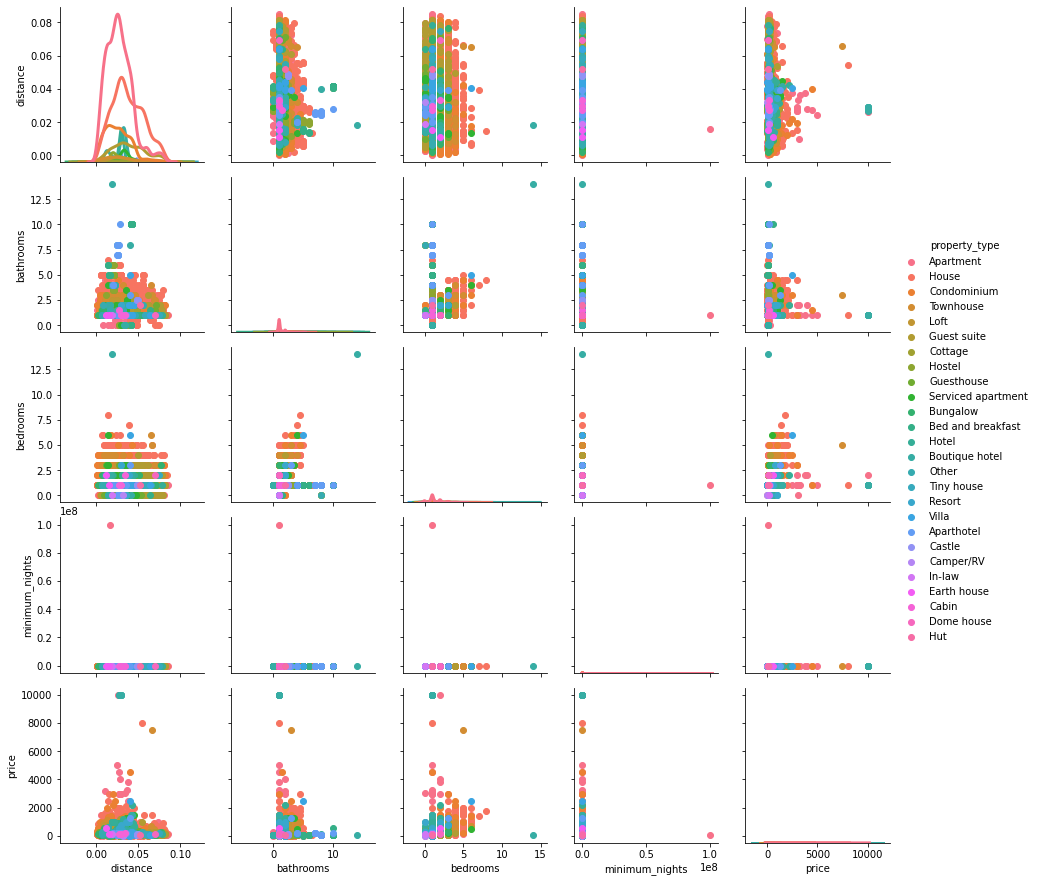

In [14]:
#pair plotting

g = sb.PairGrid(df2, hue='property_type')
g.map_offdiag(plt.scatter)
g.map_diag(sb.kdeplot, lw = 3, legend = False);

g.add_legend()
plt.show()


### Analysis notes
=> Exploratory Analysis

Pair plotting to see correlations possibilities and looking for others insights, the most visible was bathroom and bedroom positive correlation.

To avoid the usual waste of diagonal information, the diagonal received the histogram, reinforced the large number of Apartments and Houses, making others visualization complicated.

The property color legend is important to see the majority of apartment and house effect and graphic position.


- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data &#9989;
- Deal with price equal zero &#9989;
- Some independent variables should receive treatment

In [15]:
#checking the dataframe
df2.describe()

distance    bathrooms     bedrooms  minimum_nights         price
count  8110.000000  8110.000000  8110.000000    8.110000e+03   8110.000000
mean      0.031136     1.393958     1.345746    1.234678e+04    225.434895
std       0.016848     0.924136     0.925151    1.110426e+06    412.270858
min       0.000249     0.000000     0.000000    1.000000e+00     10.000000
25%       0.018808     1.000000     1.000000    2.000000e+00    100.000000
50%       0.029334     1.000000     1.000000    4.000000e+00    150.000000
75%       0.040588     1.500000     2.000000    3.000000e+01    240.000000
max       0.085153    14.000000    14.000000    1.000000e+08  10000.000000

In [16]:
#dealing with outliers
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print("Interquartile range\n")
print(IQR)




Interquartile range

distance            0.02178
bathrooms           0.50000
bedrooms            1.00000
minimum_nights     28.00000
price             140.00000
dtype: float64


In [17]:
print("number of outliers\n")
print(((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum())

number of outliers

bathrooms         733
bedrooms          242
distance          194
minimum_nights     83
price             583
property_type       0
room_type           0
dtype: int64


### Analysis notes
=> Clean Data

Most of outliers cases are from bedrooms and bathrooms

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data &#9989;
- Deal with price equal zero &#9989;
- Some independent variables should receive treatment 

In [18]:

print(" {} rows before exclude outliers.".format(df2.shape[0]))
df2 = df2.drop(df2[df2["minimum_nights"] > 30].index)
print(" {} rows after exclude minimum_nights outliers.".format(df2.shape[0]))



print("There correlation between bathrooms and bedrooms is {:.2f}.".format(df2['bathrooms'].corr(df2['bedrooms'])))
df2 = df2.drop(df2[df2["bathrooms"] > 4].index)
print(" {} rows after exclude more than 4 bathrooms outliers.".format(df2.shape[0]))
df2 = df2.drop(df2[df2["bedrooms"] > 4].index)
print(" {} rows after exclude more than 4 bedrooms outliers.".format(df2.shape[0]))


 8110 rows before exclude outliers.
 7797 rows after exclude minimum_nights outliers.
There correlation between bathrooms and bedrooms is 0.33.
 7624 rows after exclude more than 4 bathrooms outliers.
 7587 rows after exclude more than 4 bedrooms outliers.


### Analysis notes
=> Clean Data

Minimum nights above 30 days become a long term arregment, so is beter to exclude that

We choose exclude too cases where the number of bathrooms and bedrooms are above 4.
As they have a positive correlation, the number of cases still have statistical significance

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data &#9989;
- Deal with price equal zero &#9989;
- Some independent variables should receive treatment 

In [19]:
# calculate correlation matrix after exclude outliers
corr = df2[["distance", "bathrooms", "bedrooms", "minimum_nights", "price"]].corr()
corr






distance  bathrooms  bedrooms  minimum_nights     price
distance        1.000000  -0.037128 -0.009192       -0.073184 -0.053116
bathrooms      -0.037128   1.000000  0.518543        0.032983  0.158442
bedrooms       -0.009192   0.518543  1.000000       -0.049241  0.240813
minimum_nights -0.073184   0.032983 -0.049241        1.000000 -0.109619
price          -0.053116   0.158442  0.240813       -0.109619  1.000000

### Analysis notes
=> Clean Data

Bedrooms are more correlated with price than bedrooms (but very weak), distance and miminum nights are less correlated (negative)

After exclude outliers the bathroom-bedroom correlation rise to a medium 0.52

Possible masking relationship bathrooms is positively correlated with the outcome price  but also positively correlated with a different feature minimum_nights that has a negative effect on price, then the indirect correlation (bathrooms -> minimum_nights -> price) can overwhelm the direct correlation (bathrooms -> price)

- Check possibility of Data duplicated &#9989;
- Check Property and Room type typo/misspelling &#9989;
- Price with $ must be transformed in float &#9989;
- Check for missing data &#9989;
- Deal with price equal zero &#9989;
- Some independent variables should receive treatment &#9989;

In [20]:
#create dummy variables for the string columns 
df3 = pd.get_dummies(df2.reset_index(drop=True))
cols = df3.columns.tolist()
cols = cols[0:4] + cols[5:]+ cols[4:5]
df3 =df3[cols]

df3.head(10)



distance  bathrooms  bedrooms  minimum_nights  property_type_Aparthotel  \
0  0.004966        1.0       1.0               1                         0   
1  0.030424        1.0       1.0               1                         0   
2  0.022833        1.0       2.0              30                         0   
3  0.011124        1.5       2.0               6                         0   
4  0.010345        1.0       1.0               1                         0   
5  0.024921        1.0       1.0               1                         0   
6  0.018359        1.0       2.0              30                         0   
7  0.029309        1.0       0.0              30                         0   
8  0.010283        1.0       3.0              30                         0   
9  0.009445        2.0       3.0              30                         0   

   property_type_Apartment  property_type_Bed and breakfast  \
0                        1                                0   
1                        0                                0   
2                        1                                0   
3                        0                                0   
4                        0                                0   
5                        0                                0   
6                        0                                0   
7                        1                                0   
8                        1                                0   
9                        1                                0   

   property_type_Boutique hotel  property_type_Bungalow  property_type_Cabin  \
0                             0                       0                    0   
1                             0                       0                    0   
2                             0                       0                    0   
3                             0                       0                    0   
4                             0                       0                    0   
5                             0                       0                    0   
6                             0                       0                    0   
7                             0                       0                    0   
8                             0                       0                    0   
9                             0                       0                    0   

   ...  property_type_Resort  property_type_Serviced apartment  \
0  ...                     0                                 0   
1  ...                     0                                 0   
2  ...                     0                                 0   
3  ...                     0                                 0   
4  ...                     0                                 0   
5  ...                     0                                 0   
6  ...                     0                                 0   
7  ...                     0                                 0   
8  ...                     0                                 0   
9  ...                     0                                 0   

   property_type_Tiny house  property_type_Townhouse  property_type_Villa  \
0                         0                        0                    0   
1                         0                        0                    0   
2                         0                        0                    0   
3                         0                        0                    0   
4                         0                        0                    0   
5                         0                        0                    0   
6                         0                        0                    0   
7                         0                        0                    0   
8                         0                        0                    0   
9                         0                        0                    

### Analysis notes
=> Pre-processing

Due to string use in some variable (bedrooms and bathrooms), every case will be transformed in a binary entry (0 or 1). This so called “dummy variable” allow our model to be compute.

In [21]:
# separate data into X (independent variable) features and Y target (dependent variable) and random split the train and test data 
X = df3.drop(columns=["price"])
Y = df3["price"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=17, shuffle=True)

X_test.describe()

distance   bathrooms    bedrooms  minimum_nights  \
count  759.000000  759.000000  759.000000      759.000000   
mean     0.031537    1.287879    1.330698       14.354414   
std      0.017429    0.558395    0.895603       13.758838   
min      0.001715    0.000000    0.000000        1.000000   
25%      0.018537    1.000000    1.000000        2.000000   
50%      0.029056    1.000000    1.000000        4.000000   
75%      0.041432    1.500000    2.000000       30.000000   
max      0.081500    4.000000    4.000000       30.000000   

       property_type_Aparthotel  property_type_Apartment  \
count                759.000000               759.000000   
mean                   0.003953                 0.400527   
std                    0.062786                 0.490328   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 1.000000   
max                    1.000000                 1.000000   

       property_type_Bed and breakfast  property_type_Boutique hotel  \
count                       759.000000                    759.000000   
mean                          0.001318                      0.032938   
std                           0.036298                      0.178592   
min                           0.000000                      0.000000   
25%                           0.000000                      0.000000   
50%                           0.000000                      0.000000   
75%                           0.000000                      0.000000   
max                           1.000000                      1.000000   

       property_type_Bungalow  property_type_Cabin  ...  property_type_Other  \
count              759.000000           759.000000  ...           759.000000   
mean                 0.001318             0.001318  ...             0.001318   
std                  0.036298             0.036298  ...             0.036298   
min                  0.000000             0.000000  ...             0.000000   
25%                  0.000000             0.000000  ...             0.000000   
50%                  0.000000             0.000000  ...             0.000000   
75%                  0.000000             0.000000  ...             0.000000   
max                  1.000000             1.000000  ...             1.000000   

       property_type_Resort  property_type_Serviced apartment  \
count            759.000000                        759.000000   
mean               0.001318                          0.014493   
std                0.036298                          0.119589   
min                0.000000                          0.000000   
25%                0.000000                          0.000000   
50%                0.000000                          0.000000   
75%                0.000000                          0.000000   
max                1.000000                          1.000000   

       property_type_Tiny house  property_type_Townhouse  property_type_Villa  \
count                759.000000               759.000000                759.0   
mean                   0.001318                 0.015810                  0.0   
std                    0.036298                 0.124823                  0.0   
min                    0.000000                 0.000000                  0.0   
25%                    0.000000                 0.000000                  0.0   
50%                    0.000000                 0.000000                  0.0   
75%                    0.000000                 0.000000                  0.0   
max                    1.000000                 1.000000                  0.0   

       room_type_Entire home/apt  room_type_Hotel room  \
count                 759.000000            759.000000   
mean                    0.588933              0.017128   
std                     0.492352              0.129833   


### Analysis notes
=> Pre-processing

Due to small number of cases the test size was establish in 10%, the random state was settled at 17 to allow reproducibility for verification and stimulate other uses of this study.

The distance, bathrooms, bedrooms, minimum nights have several ranges (not equal to one as the other variables create from property_type and room_type)
So a normalization can help.

In [22]:
# normalization
# define the scaler 
scaler = MinMaxScaler(feature_range=(0, 1))

# fit and transform the train set
X_train[["distance", "bathrooms", "bedrooms", "minimum_nights"]] = scaler.fit_transform(X_train[["distance", "bathrooms", "bedrooms", "minimum_nights"]])

# tranform the test set
X_test[["distance", "bathrooms", "bedrooms", "minimum_nights"]] = scaler.transform(X_test[["distance", "bathrooms", "bedrooms", "minimum_nights"]])
X_test.describe()

distance   bathrooms    bedrooms  minimum_nights  \
count  759.000000  759.000000  759.000000      759.000000   
mean     0.368517    0.321970    0.332675        0.460497   
std      0.205280    0.139599    0.223901        0.474443   
min      0.017264    0.000000    0.000000        0.000000   
25%      0.215392    0.250000    0.250000        0.034483   
50%      0.339295    0.250000    0.250000        0.103448   
75%      0.485056    0.375000    0.500000        1.000000   
max      0.956976    1.000000    1.000000        1.000000   

       property_type_Aparthotel  property_type_Apartment  \
count                759.000000               759.000000   
mean                   0.003953                 0.400527   
std                    0.062786                 0.490328   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 1.000000   
max                    1.000000                 1.000000   

       property_type_Bed and breakfast  property_type_Boutique hotel  \
count                       759.000000                    759.000000   
mean                          0.001318                      0.032938   
std                           0.036298                      0.178592   
min                           0.000000                      0.000000   
25%                           0.000000                      0.000000   
50%                           0.000000                      0.000000   
75%                           0.000000                      0.000000   
max                           1.000000                      1.000000   

       property_type_Bungalow  property_type_Cabin  ...  property_type_Other  \
count              759.000000           759.000000  ...           759.000000   
mean                 0.001318             0.001318  ...             0.001318   
std                  0.036298             0.036298  ...             0.036298   
min                  0.000000             0.000000  ...             0.000000   
25%                  0.000000             0.000000  ...             0.000000   
50%                  0.000000             0.000000  ...             0.000000   
75%                  0.000000             0.000000  ...             0.000000   
max                  1.000000             1.000000  ...             1.000000   

       property_type_Resort  property_type_Serviced apartment  \
count            759.000000                        759.000000   
mean               0.001318                          0.014493   
std                0.036298                          0.119589   
min                0.000000                          0.000000   
25%                0.000000                          0.000000   
50%                0.000000                          0.000000   
75%                0.000000                          0.000000   
max                1.000000                          1.000000   

       property_type_Tiny house  property_type_Townhouse  property_type_Villa  \
count                759.000000               759.000000                759.0   
mean                   0.001318                 0.015810                  0.0   
std                    0.036298                 0.124823                  0.0   
min                    0.000000                 0.000000                  0.0   
25%                    0.000000                 0.000000                  0.0   
50%                    0.000000                 0.000000                  0.0   
75%                    0.000000                 0.000000                  0.0   
max                    1.000000                 1.000000                  0.0   

       room_type_Entire home/apt  room_type_Hotel room  \
count                 759.000000            759.000000   
mean                    0.588933              0.017128   
std                     0.492352              0.129833   


### Analysis notes
=> Pre-processing

The distance, bathrooms, bedrooms, minimum nights were transformed to a continuum number start from 0 until 1. This can make the algorithms converge faster.

# Models Training

Classification, Natural Language Processing, Optimization are examples of other uses of IA that uses different tools and modules Python modules.

This is a typical regression problem, using some independent variables we must find, in this case, one dependable variable.

The basic regression problem tries to find the coefficients to minimize the error of this expression Y = ax1 + bx2 + c + &#949;

Given some renter input matrix values, the objective is find the best model and parameters to predict the rental price testing step by step complex algorithms.



In [23]:
#testing linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

In [24]:
# calculate R-squared
lin_r2 = regressor.score(X_test, y_test)
print("Liner Regression R-squared: {}".format(lin_r2))

Liner Regression R-squared: 0.11606736199575685


In [25]:
# calculate root mean squared error (RMSE)

y_pred = regressor.predict(X_test)
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))


# calculate mean absolute error (MAE)


lin_mae = mean_absolute_error(y_pred, y_test)
print("Liner Regression MAE: {}".format(lin_mae))

Liner Regression RMSE: 384.0171157860323
Liner Regression MAE: 105.75552902988417


### Analysis notes
=> Model Training

R-squared too low

In [26]:
#trying random forest


rf = RandomForestRegressor(random_state=17)

In [27]:
# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [28]:
# calculate R-squared
forest_r2 = rf.score(X_test, y_test)
print("Random Forest R-squared: {}".format(forest_r2))

Random Forest R-squared: 0.7747903311299987


In [29]:
# calculate root mean squared error (RMSE) and mean absolute error (MAE)


y_pred = rf.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))

forest_mae = mean_absolute_error(y_pred, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

Random Forest Regression RMSE: 193.8360327604518
Random Forest Regression MAE: 90.40569169960474


### Analysis notes
=> Model Training

very good improve at R-squared

In [30]:
# plot feature importances

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

feat_importances.nlargest(10).sort_values().plot(kind='barh', color="Red")

<AxesSubplot:title={'center':'Feature Importances'}>

### Analysis notes
=> Model Training

distance is the main feature, 7 time the next features

In [31]:
# trying GridSearchCV Random Forest


params = {'max_depth': list(range(20, 30, 2)), 'n_estimators': list(range(30, 40, 2))}
grf = RandomForestRegressor(random_state=17)

In [32]:
# use gridsearch to find the best parameter
forest_reg = GridSearchCV(grf, params, cv=5)

# fit the model
forest_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
             param_grid={'max_depth': [20, 22, 24, 26, 28],
                         'n_estimators': [30, 32, 34, 36, 38]})

In [33]:
forest_reg.best_estimator_

RandomForestRegressor(max_depth=22, n_estimators=36, random_state=17)

In [34]:
# best parameter values
print("Best Params:", forest_reg.best_params_)

Best Params: {'max_depth': 22, 'n_estimators': 36}


In [35]:
# best CV score
print("Best CV Score:", forest_reg.best_score_)

Best CV Score: 0.1866845847396708


In [36]:
y_pred = forest_reg.predict(X_test)
gforest_r2 = forest_reg.score(X_test, y_test)
print("GridSearchCV Random Forest R-squared: {}".format(gforest_r2))
# calculate root mean squared error (RMSE)


gforest_mse = mean_squared_error(y_pred, y_test)
gforest_rmse = np.sqrt(gforest_mse)
print("GridSearchCV Random Forest Regression RMSE: {}".format(gforest_rmse))

# calculate mean absolute error (MAE)

gforest_mae = mean_absolute_error(y_pred, y_test)
print("GridSearchCV Random Forest Regression MAE: {}".format(gforest_mae))

GridSearchCV Random Forest R-squared: 0.7822560860623063
GridSearchCV Random Forest Regression RMSE: 190.5960996642672
GridSearchCV Random Forest Regression MAE: 89.24266578958469


### Analysis notes
=> Model Training

Even better improve at R-squared, let´s see the feature importances to understand what is going on.

In [37]:
# plot feature importances

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
feat_importances = pd.Series(forest_reg.best_estimator_.feature_importances_, index=X_train.columns)

feat_importances.nlargest(10).sort_values().plot(kind='barh', color="Red")

<AxesSubplot:title={'center':'Feature Importances'}>

### Analysis notes
=> Model Training

distance is the main feature, six time the next features

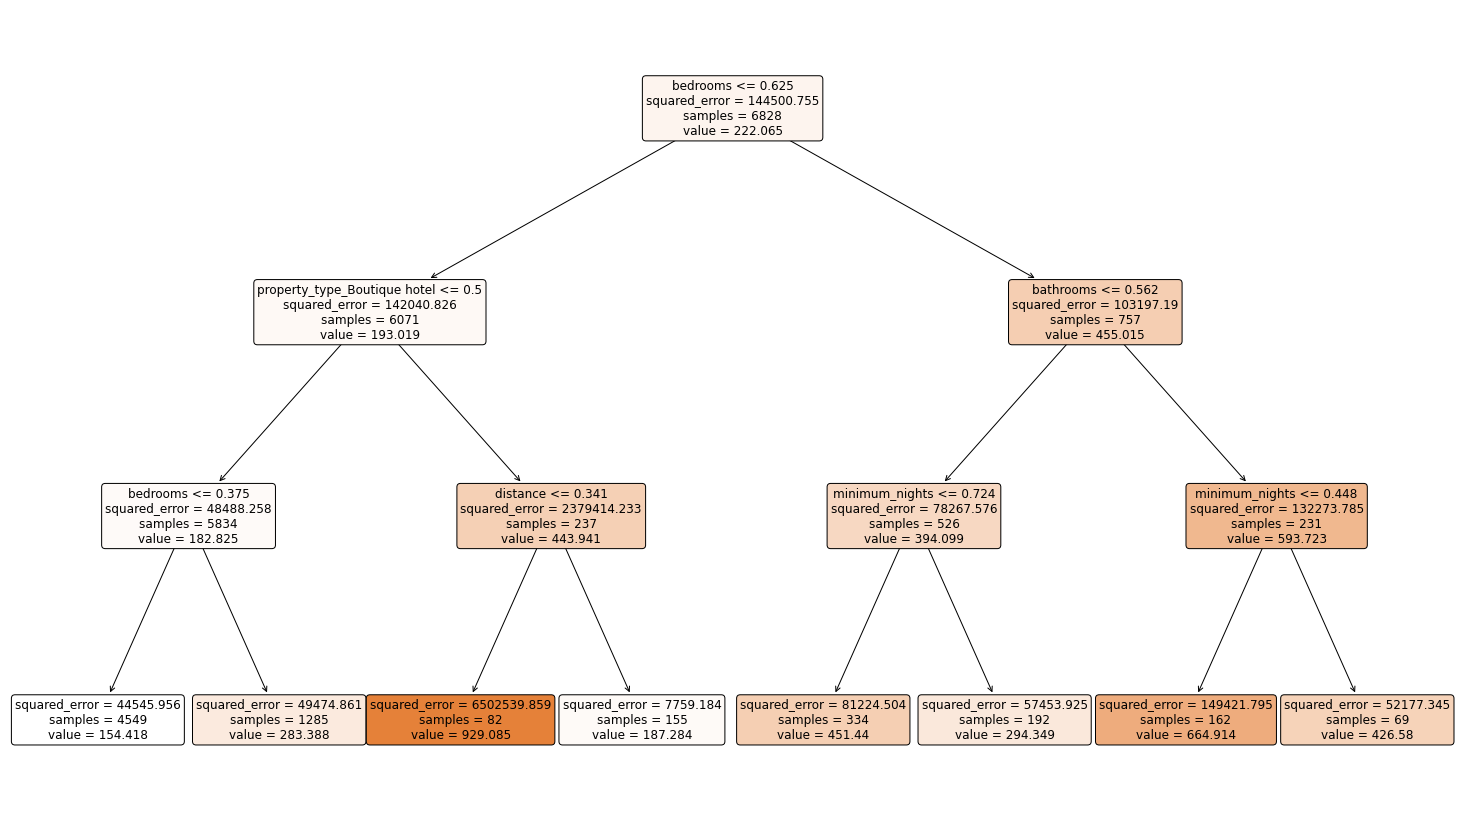

In [38]:
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)
# make prediction
y_pred = regressor.predict(X_test)
dfx=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

regressor.score(X_test, y_test)
plt.figure(figsize=(26,15))
tree.plot_tree(regressor, filled=True, fontsize=12, feature_names = df3.columns[0:], rounded = True)
plt.show()

### Analysis notes
=> Model Training

First level was the bedroom, lets check RMSE to see if we must concern about different features dominating different models


In [39]:
# calculating R-squared, RMSE and MAE

dt_r2 = regressor.score(X_test, y_test)
print("Decision tree R-squared: {}".format(dt_r2))

dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Decision Tree Regression RMSE: {}".format(dt_rmse))

#forest_mae = mean_absolute_error(y_pred, y_test)
dt_mae = metrics.mean_absolute_error(y_test, y_pred)
print("Decision Tree Regression MAE: {}".format(dt_mae))

Decision tree R-squared: 0.13461701969056816
Decision Tree Regression RMSE: 379.9663800058656
Decision Tree Regression MAE: 112.34450377010934


### Analysis notes
=> Model Training

No worring about the bedrooms feature importance due a low R-square

In [40]:
# testing Gradient Boosting Regressor

gbreg = GradientBoostingRegressor(random_state=17)
gbreg.fit(X_train, y_train)
y_pred = gbreg.predict(X_test)

In [41]:
# calculating R-squared, RMSE and MAE
gbr_r2 = gbreg.score(X_test, y_test)
print("Gradient Boosting Regressor R-squared: {}".format(gbr_r2))

gbr_mse = mean_squared_error(y_pred, y_test)
gbr_rmse = np.sqrt(gbr_mse)
print("Gradient Boosting Regressor Regression RMSE: {}".format(gbr_rmse))

gbr_mae = mean_absolute_error(y_pred, y_test)
print("Gradient Boosting Regressor Regression MAE: {}".format(gbr_mae))

Gradient Boosting Regressor R-squared: 0.6063234949809257
Gradient Boosting Regressor Regression RMSE: 256.27765694295425
Gradient Boosting Regressor Regression MAE: 89.89119776660756


### Analysis notes
=> Model Training

A pretty good R-square.

In [42]:
# trying GridSearchCV GradientBoostingRegressor


param_grid = {"n_estimators": [300], #, 250, 300
              "max_features": [10], #2, 4, 6, 8, 
              "max_depth": [10]} #, 15, 20
                                
gbr = GradientBoostingRegressor(random_state=17)

ggbreg = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=5)

# fit the model
ggbreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=17),
             n_jobs=1,
             param_grid={'max_depth': [10], 'max_features': [10],
                         'n_estimators': [300]})

In [43]:
# best estimator learned through GridSearch
ggbreg.best_estimator_

GradientBoostingRegressor(max_depth=10, max_features=10, n_estimators=300,
                          random_state=17)

In [44]:
# best parameter values
print("Best Params:", ggbreg.best_params_)

Best Params: {'max_depth': 10, 'max_features': 10, 'n_estimators': 300}


In [45]:
# best CV score
print("Best CV Score:", ggbreg.best_score_)

Best CV Score: 0.02928033796036018


In [46]:
# calculating R-squared, RMSE and MAE
y_pred = ggbreg.predict(X_test)
ggbr_r2 = ggbreg.score(X_test, y_test)
print("Gradient Boosting Regressor R-squared: {}".format(ggbr_r2))

ggbr_mse = mean_squared_error(y_pred, y_test)
ggbr_rmse = np.sqrt(ggbr_mse)
print("Gradient Boosting Regressor Regression RMSE: {}".format(ggbr_rmse))

ggbr_mae = mean_absolute_error(y_pred, y_test)
print("Gradient Boosting Regressor Regression MAE: {}".format(ggbr_mae))

Gradient Boosting Regressor R-squared: 0.8022924648477789
Gradient Boosting Regressor Regression RMSE: 181.61537315558763
Gradient Boosting Regressor Regression MAE: 85.10173507863819


### Analysis notes
=> Model Training

A very better R-square. Lets plot the feature importances

In [47]:
# plot feature importances

plt.figure(figsize=(15,15))
plt.title("Feature Importances")
feat_importances = pd.Series(ggbreg.best_estimator_.feature_importances_, index=X_train.columns)

feat_importances.nlargest(10).sort_values().plot(kind='barh', color="Red")

<AxesSubplot:title={'center':'Feature Importances'}>

### Analysis notes
=> Model Training

Once again distance is a very important feature, this time 7 times stronger than the second place

In [48]:
# trying tensorflow with keras



In [49]:
# initialize the constructor
model = Sequential()

# add a densely-connected layer with 64 units to the model
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))

# add another layer with 64 units
model.add(Dense(64, activation="relu"))

# add an output layer with 1 output unit
model.add(Dense(1))

# model output shape
print(model.output_shape)

# model summary
print(model.summary())

# model config
model.get_config()

#set up training

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss="mse",
              optimizer=optimizer,
              metrics=["mae"])

(None, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
_________________________________________________________________
None


2022-06-21 04:50:08.987042: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-21 04:50:08.987073: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-21 04:50:08.987092: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d65b5f95-85e3-463f-abdb-594a8d321fad): /proc/driver/nvidia/version does not exist
2022-06-21 04:50:08.987465: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [51]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [52]:
y_pred = model.predict(X_test)
[mse, mae] = model.evaluate(X_test, y_test, verbose=0)
keras_rmse = np.sqrt(int(mse))
keras_mae = mae



# calculate R-squared

keras_r2 = r2_score(y_test, y_pred)

print("Tensorflow with Keras Sequential model R-squared: {}".format(keras_r2))
print("Testing set Root Mean Squared Error: RMSE = {}".format(keras_rmse))
print("Testing set Mean Absolute Error: MAE = {}".format(keras_mae))

Tensorflow with Keras Sequential model R-squared: 0.10914061875402314
Testing set Root Mean Squared Error: RMSE = 385.51783356934345
Testing set Mean Absolute Error: MAE = 98.67748260498047


### Analysis notes
=> Model Training

A small R-square. 

In [53]:
#trying XGBoost
A, b = df3.iloc[:,:-1],df3.iloc[:,-1]
xgb_dmatrix = xgb.DMatrix(data = A, label = b)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE before 'boost': %f" % (rmse))


RMSE before 'boost': 400.115103


    train-rmse-mean  train-rmse-std  train-mae-mean  train-mae-std  \
20        318.37679       58.740662       88.706924       7.703271   

    test-rmse-mean  test-rmse-std  test-mae-mean  test-mae-std  
20      331.515707     110.277735      92.977165      9.862692  


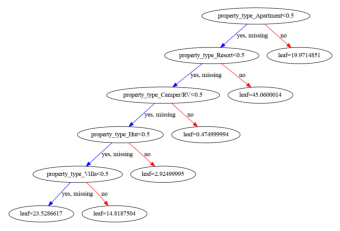

In [54]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=xgb_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics=["rmse","mae"], as_pandas=True, seed=17)
cv_results.head()
#print((cv_results["test-rmse-mean"]).tail(1))
print((cv_results).tail(1))
xg_reg = xgb.train(params=params, dtrain=xgb_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [28, 28]
plt.show()




### Analysis notes
=> Model Training

At this case is not the distance the first node, lets check the R-square 

In [55]:
xgb_r2 = r2_score(y_test, y_pred)
print("XGBoost R-squared: {}".format(xgb_r2))

xgb_rmse = (cv_results["test-rmse-mean"]).iloc[-1]

print("XGBoost RMSE: {}".format(xgb_rmse))

xgb_mae = (cv_results["test-mae-mean"]).iloc[-1]
print("XGBoost MAE: {}".format(xgb_mae))

XGBoost R-squared: 0.10914061875402314
XGBoost RMSE: 331.51570666666663
XGBoost MAE: 92.97716500000001


### Analysis notes
=> Model Training

A small R-square. No need to worry about feature most important.

# Models Evaluating

Beside the R-squared, RSME and MAE metrics, some scatter plot applied over all the mass of data is a good option to visualize the effectiveness of the model estimator.

- **R-squared** (or R2 for short): represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one. **Higher better**

- **RSME**: Root Mean Squared Error -> square root of Mean Squared error. It measures the standard deviation of residuals. **Lower better**

- **MAE**:  Mean absolute error - > represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset. **Lower better**

The last step of this problem is the analysis task with the threshold of 25 dollars, transformed to a % indicator as explained above.

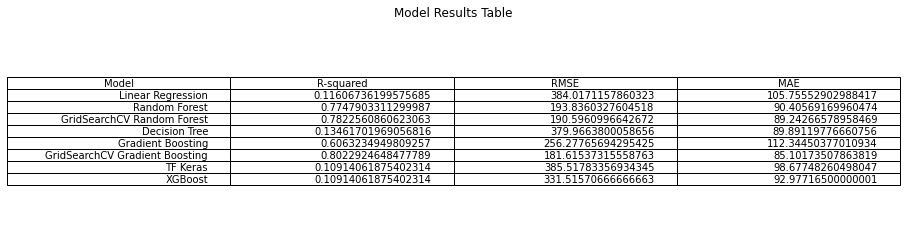

In [56]:
# combine all models' results into one dataframe
data = {"Model": ["Linear Regression", "Random Forest", "GridSearchCV Random Forest", "Decision Tree" ,"Gradient Boosting", "GridSearchCV Gradient Boosting", "TF Keras", "XGBoost"], 
        "R-squared": [lin_r2, forest_r2, gforest_r2, dt_r2, gbr_r2, ggbr_r2, keras_r2, xgb_r2],           
        "RMSE": [lin_rmse, forest_rmse, gforest_rmse, dt_rmse, gbr_rmse, ggbr_rmse, keras_rmse, xgb_rmse],
        "MAE": [lin_mae, forest_mae, gforest_mae, gbr_mae, dt_mae, ggbr_mae, keras_mae, xgb_mae]}

model_results = pd.DataFrame(data=data)
model_results.style.set_table_attributes("style='display:inline'").set_caption('Model Results Table')

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(111)

ax.table(cellText = model_results.values,
          colLabels = model_results.columns,
          loc = "center"
         )
ax.set_title("Model Results Table")

ax.axis("off");

### Analysis notes
=> Model Evaluation

Now each one of the models has the evaluator calculated, we can compare to choose the best model until now

R-square results show three macro-clusters (R-square at similar level):
1) Random Forest, GridSearchCV Random Forest and GridSeaerchCV Gradiente Boosting
2) Gradiente Boosting
3) Decision Tree, XGBoost, TF Keras and Linear Regression

When we compare looking for highers R-Square then lower RMSE and, at last, lower MAE
1) GridSearchCV Random Forest (best model)
2) Random Forest
3) GridSeaerchCV Gradiente Boosting
4) Gradiente Boosting
5) Decision Tree
6) Linear Regression
7) XGBoost
8) TF Keras

Here the effect of the GridSearchCV was evident due to error minimization (see MAE column)

In [57]:
#calculating the number of cases with the prediction beyond the client asked threshold


y_prev_final = ggbreg.predict(X)
list_of_tuples = list(zip(Y, y_prev_final))
df4 = pd.DataFrame(list_of_tuples,
                  columns=['Real Price', 'Predicted Price'])
unpleased_measure = 100*sum(df4["Real Price"]>(df4["Predicted Price"])+25)/len(df4.index)

print("Clients unpleased with the model GridSearchCV Gradient Boosting: {:.2f}%".format(round(unpleased_measure, 2)))

y_prev_final = forest_reg.predict(X)
list_of_tuples = list(zip(Y, y_prev_final))
df4 = pd.DataFrame(list_of_tuples,
                  columns=['Real Price', 'Predicted Price'])
unpleased_measure = 100*sum(df4["Real Price"]>(df4["Predicted Price"])+25)/len(df4.index)

print("Clients unpleased with the model GridSearchCV Random Forest: {:.2f}%".format(round(unpleased_measure, 2)))

y_prev_final = rf.predict(X)
list_of_tuples = list(zip(Y, y_prev_final))
df4 = pd.DataFrame(list_of_tuples,
                  columns=['Real Price', 'Predicted Price'])
unpleased_measure = 100*sum(df4["Real Price"]>(df4["Predicted Price"])+25)/len(df4.index)

print("Clients unpleased with the model Random Forest: {:.2f}%".format(round(unpleased_measure, 2)))



Clients unpleased with the model GridSearchCV Gradient Boosting: 8.30%
Clients unpleased with the model GridSearchCV Random Forest: 6.88%
Clients unpleased with the model Random Forest: 6.08%


### Analysis notes
=> Model Evaluation

This task asks for a specific threshold of 25 dollars as a limit where the renters get frustrated about the prevision. So a specific percentage indicator was made to address this problem and be a measure of the three best model as ranked before.

The result show **6.08.%** of the cases will be outside this limit and can leave some renters upset.

The level of angriness and the effect on rent add withdraw of the site is unknown.

# Outcome

The main problem faced by the website owners is the retention of their customers who rent their spaces. To help convince their customers, the site decided to offer a rental price prediction service. This study analyzed several modeling tools seeking to optimize the prediction results.
The following models were tested in that order:
1. Linear Regression
2. Random Forest
3. GridSearchCV Random Forest
4. Decision Tree
5. Gradient Boosting
6. GridSearchCV Gradient Boosting 
7. TF Keras
8. XGBoost

As the result we got the Gradient Boosting modified with the GridSearchCV module give the best (higher) R2 and the lowest RMSE and MAE. 
Model position presented as discussed when the models had been evaluated above.

| Modelo                            | R-square              | RMSE                 | MAE
|-----------------------------------|-----------------------|----------------------|-------------------
| 1 GridSearchCV Gradient Boosting  | 0.8022924648477789    | 181.61537315558763   | 85.10173507863819
| 2 GridSearchCV Random Forest      | 0.7822560860623063    | 190.5960996642672    | 89.24266578958469
| 3 **Random Forest**               | 0.7747903311299987    | 193.8360327604518    | 90.40569169960474
| 4 Gradient Boosting               | 0.6063234949809257    | 256.27765694295425   | 112.34450377010934
| 5 Decision Tree                   | 0.13461701969056816   | 379.9663800058656    | 90.80514363806556
| 6 Linear Regression               | 0.11606736199575685   | 384.0171157860323    | 105.75552902988417
| 7 XGBoost                         | 0.1089576570833124    | 331.5157166666667    | 92.977173
| 8 TF Keras                        | 0.1089576570833124    | 385.5580371357858    | 100.562744140625

But when we look about the % unplesead of the first three places, the best model is the random forest.

| Modelo                            | % unplesead 
|-----------------------------------|------------
| 1 **Random Forest**               | 6.08%
| 2 GridSearchCV Random Forest      | 6.88%
| 3 GridSearchCV Gradient Boosting  | 8.30%



The analysis of feature importance of some of the models shows different importance, but the most impressive result was the best model showing that the distance importance was 7 times higher than other factors.

In this way, the correctness of treating latitude and longitude over a dummy variable capable of synthesizing the contribution of both and serving as a proxy for the distance from the financial or work center of the city in which the data were generated was proved.

The final result of **6.08%** can be improved to seek better customer satisfaction and consequently improve conversion rate.

The distance feature has shown the most importance variable explaining the price variance. The next five variable importance are bedrooms, Boutique Hotel-property type, Minimum Nights, Private room-room type and bathrooms, but each one six times less important as graphic presented above.

The distance as a main factor (**0.62**) and with a negative correlation (**-0.053116**) this indicates that the closer to the "center of mass" of the data, the greater the rent appreciation. With this, it is possible to change the strategy of waiting for the conversion of website visitors to a digital marketing strategy focused on these regions given the greater profitability of these contracts.


# Future work

The next phase procedure is search new models such a **cluster analysis** as above suggested to improve the r2.

Beside that the improvement of the models used here can be achieve find **other independent variables** such as:
- Selling price of the units
- Mortgage Yield, conditions, maturity, etc
- Latitude and Longitude of the economic center or main work stations location
- Transport options
- Livin costs
- Wages

The main feature predictor was distance, so a business strategy effective is to **focus the digital marketing** on areas near the center.

The model with best result can change with new data, so it is important reevaluate the Model Results Table.

The needs of housing can be cultural traits, but the analysis of some **comparation with other cities and countries** can be insights to the modeling as well business ideas for the client.

To the client is important procedure to the automation of this code to receive online input of new rentals in a deploy version aiming **real time estimator** tuning. A Django site can ease receive the automation task once this work was made with Python language to fast support the client coding requirements.

An **A/B test of price suggestion** can be used to improve conversion rate and fine tune the 25 dollars’ threshold of estimation error public aversion.
